In [ ]:
f <- function(net){
    return (1/(1+exp(-net)))
}

df_dnet <- function(f_net){
    return (f_net * (1-f_net))
}

#arquitetura
mlp.arch <- function(input.length=2, hidden.length=2, output.length=1, act.function = f , d_act.function = df_dnet){
     
    model = list()
    #tamanos
    model$input.length = input.length
    model$hidden.length = hidden.length
    model$output.length = output.length

    #inicializa valores
    model$hidden = matrix(runif(min=-0.5, max=0.5, hidden.length*(input.length+1)),
          nrow=hidden.length, ncol=input.length+1)
    
    model$output = matrix(runif(min=-0.5, max=0.5, output.length*(hidden.length+1)),
                                nrow=output.length, ncol=hidden.length+1)
    
    #referneciando funções
    model$f = act.function
    model$df_dnet = d_act.function

    return (model)
}

#fit
mlp.forward <- function(model, Xp){

    #hidden layer
    net_h_p = model$hidden %*% c(Xp, 1)
    f_net_h_p = model$f(net_h_p)

    #output layer
    net_o_p = model$output %*% c(as.numeric(f_net_h_p), 1)
    f_net_o_p = model$f(net_o_p)

    #results
    ret = list()
    ret$net_h_p = net_h_p
    ret$net_o_p = net_o_p
    ret$f_net_h_p = f_net_h_p
    ret$f_net_o_p = f_net_o_p

    return(ret)
}

mlp.backporpagation <- function(model, dataset, eta=0.1, threshold=1e-3, max.iters = 250, debug=FALSE){

    squaredError = 2 * threshold
    counter = 0

    while(squaredError > threshold && counter < max.iters){
      squaredError = 0

      for(p in 1:nrow(dataset)){
        Xp = as.numeric(dataset[p, 1:model$input.length])
        Yp = as.numeric(dataset[p, (model$input.length+1):ncol(dataset)])

        results = mlp.forward(model, Xp)
        Op = results$f_net_o_p

        #erro
        error = Yp - Op

        squaredError = squaredError + sum(error^2)

        #Cálculo do gradientes
        delta_o_p = error * model$df_dnet(results$f_net_o_p)
        w_o_kj = model$output[,1:model$hidden.length]
        delta_h_p = as.numeric(model$df_dnet(results$f_net_h_p)) * (as.numeric(delta_o_p) %*% w_o_kj)

        #treino
        model$output = model$output + eta * (delta_o_p %*% as.vector(c(results$f_net_h_p, 1)))
        model$hidden = model$hidden + eta * (t(delta_h_p) %*% as.vector(c(Xp,1)))
      }

      squaredError = squaredError / nrow(dataset)

      if(debug == TRUE){
        cat("Erro mpedio quadrado = ", squaredError, "\n")
      }
  
      counter = counter + 1
    }

    ret = list()
    ret$model = model
    ret$counter = counter

    return (ret)
}

In [ ]:
dataset  = read.table("XOR.dat")
dataset

V1,V2,V3
<int>,<int>,<int>
0,0,0
0,1,1
1,0,1
1,1,0


In [ ]:
model = mlp.arch(input.length = 2, hidden.length = 2, output.length = 1)

In [ ]:
mlp.forward(model, c(1,1))

-0.1019771
-0.1025223
-0.5466186
0.4745278
0.4743919
0.3666493


In [ ]:
trained = mlp.backporpagation(dataset=dataset, eta=0.1, model=model)

In [ ]:
trained

In [ ]:
mlp.forward(trained$model, c(1,0))

In [ ]:
teste <- function(eta=0.2, hyp.max=100){
  dataset = cbind(rnorm(mean=0, sd=1, n=100), rnorm(mean=0, sd=1, n=100), 0)
  dataset = rbind(dataset, cbind(rnorm(mean=10, sd=1, n=100), rnorm(mean=10, sd=1, n=100), 1))
  dataset = rbind(dataset, cbind(rnorm(mean=20, sd=1, n=100), rnorm(mean=20, sd=1, n=100), 0))

  plot(dataset[,1:2], col=dataset[,3]+1)
  locator(1)

  ids = sample(1:nrow(dataset), size=50)
  train = dataset[ids,]
  test = dataset[-ids,]

  for(hyp in 1:hyp.max){
    model = mlp.arch(input.length=2, output.length=1, hidden.length=hyp)
    trained = mlp.backporpagation(model=model, dataset=train, eta=eta)

    wrong = 0
    for(j in 1:nrow(test)){
      x = test[j, 1:2]
      y.e = as.numeric(test[j, 3])
      y.o = round(mlp.forward(model=trained$model, Xp=x)$f_net_o_p)

      if(y.e != y.o){
        wrong = wrong+1
      }
    }

    error = wrong/nrow(test)
    cat(hyp, "\t", error, "\n")

  }
}

1 	 0.336 
2 	 0.336 
3 	 0.336 
4 	 0 
5 	 0.004 
6 	 0.34 
7 	 0.008 
8 	 0.34 
9 	 0.076 
10 	 0.104 
11 	 0.008 
12 	 0.336 
13 	 0.344 
14 	 0.316 
15 	 0.04 
16 	 0.076 
17 	 0.336 
18 	 0.148 
19 	 0.184 
20 	 0.024 
21 	 0.336 
22 	 0.304 
23 	 0.336 
24 	 0.28 
25 	 0.212 
26 	 0.228 
27 	 0.296 
28 	 0.196 
29 	 0.24 
30 	 0.34 
31 	 0.296 
32 	 0.32 
33 	 0.232 
34 	 0.22 
35 	 0.188 
36 	 0.032 
37 	 0.056 
38 	 0.024 
39 	 0.336 
40 	 0.196 
41 	 0.048 
42 	 0.204 
43 	 0.176 
44 	 0.228 
45 	 0.228 
46 	 0.024 
47 	 0.08 
48 	 0.132 
49 	 0.296 
50 	 0.236 


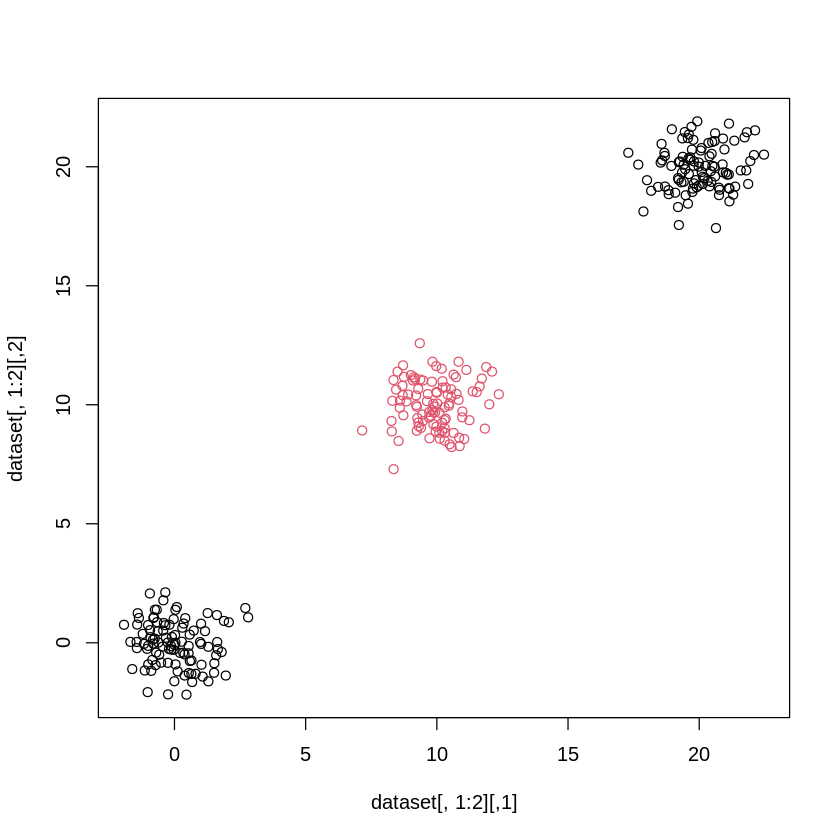

In [ ]:
teste(0.25, 50)